In [1]:
import gensim

In [2]:
%%time
model = gensim.models.KeyedVectors.load_word2vec_format('data/GoogleNews-vectors-negative300.bin', binary=True)

CPU times: user 44.8 s, sys: 6.57 s, total: 51.4 s
Wall time: 1min 52s


In [3]:
filename = 'data/questions-words.txt'
countries = set()
with open(filename, 'rt') as f:
    for line in f:
        words = line.strip()
        if words.startswith(':'):
            if len(countries) > 0:
                break
        else:
            countries.add(words.split()[1])
print(len(countries))

23


In [4]:
countries

{'Afghanistan',
 'Australia',
 'Canada',
 'China',
 'Cuba',
 'Egypt',
 'England',
 'Finland',
 'France',
 'Germany',
 'Greece',
 'Iran',
 'Iraq',
 'Italy',
 'Japan',
 'Norway',
 'Pakistan',
 'Russia',
 'Spain',
 'Sweden',
 'Switzerland',
 'Thailand',
 'Vietnam'}

In [5]:
vectors = [model.wv[country] for country in countries]

In [6]:
from sklearn.manifold import TSNE

In [9]:
tsne_model = TSNE(n_components=2)

In [10]:
X = tsne_model.fit_transform(vectors)

In [11]:
X.shape

(23, 2)

In [12]:
import matplotlib.pyplot as plt

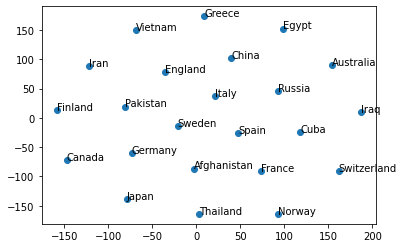

In [16]:
fig, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1])
for i, country in enumerate(countries):
    ax.annotate(country, (X[i, 0], X[i, 1]))
plt.show()